[Text(0, 0.5, 'Velocity (m/s)'), Text(0.5, 0, 'Time (sec)')]

<Figure size 432x288 with 0 Axes>

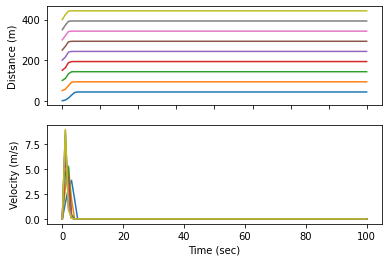

In [4]:
#Straight line model
#Assume there are 10 cars in total, and the length of the straight line is 1000 meters

from numpy import linspace,array,zeros,log,exp,sin,cos,sqrt,pi
from scipy.integrate import odeint
import matplotlib.pyplot as plt

class Car:
  def __init__(self,xinit,vinit,v_ahead,x_gap, a, b):
    # set parameters
    self.T = 1.8 #time headway
    self.delta_exp = 4
    self.L = 5
    self.a_accel = a
    self.b_decel = b
    self.v0 = 28 #desired speed in m/s
    self.s0 = 2.0 #desired gap m
    # Starting position and speed of car ahead
    self.x_a0 = xinit + x_gap
    self.v_a = v_ahead
    # set initial conditions for the car being modeled
    self.xinit = xinit
    self.vinit = vinit
    # pack i.c.
    self.X0=array([xinit, vinit])
    return

  def rate_func(self, t, V ):
    # RATE_FUNC: IDM Car model
    # Model a car approaching a car ahead moving at constant speed
    # unpack
    x = V[0] # position
    v = V[1] # velocity
    # Position of the car ahead
    x_a = self.x_a0 + self.v_a * t
    
    # Compute acceleration according to IDM
    s = x_a - self.L - x # distance to car ahead
    delv = v - self.v_a  # approach speed to car ahead
        
    star = self.s0 + self.T*v + v*delv/(2*sqrt(self.a_accel*self.b_decel))
        
    a_idm = self.a_accel*(1 - (v/self.v0)**self.delta_exp - (star/s)**2) # x component of acceleration
          
    # compute derivatives
    dx = v
    dv = a_idm
    # pack rate array
    rate = array([dx, dv])
    return rate
  def solve(self, Tstart,Tend):
    # set the time interval for solving
    # Tstart=0
    # Tend =  400 # seconds
    time = linspace(Tstart,Tend,100)
    Xout = odeint(self.rate_func, self.X0, time, tfirst=True) 
    return Xout

gap = 50
Xouts = []
for i in range(1,10):
  car = Car((i-1)*gap, 0, 0, gap, 0.4*i, 1.5*i)
  Xout = car.solve(0, 400)
  Xouts.append(Xout)

plt.figure(1)
fig, [xplt,vplt] = plt.subplots(2)
for i in range(len(Xouts)):
  xout=Xouts[i][:,0]
  vout=Xouts[i][:,1]
  time = linspace(0,400,100)
  xplt.plot(time, xout)
xplt.set(ylabel='Distance (m)')
xplt.label_outer()

plt.figure(2)
for i in range(len(Xouts)):
  vout=Xouts[i][:,1]
  time = linspace(0,100,100)
  vplt.plot(time, vout)
vplt.set(xlabel='Time (sec)', ylabel='Velocity (m/s)')


